In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# El dataset del hotel
df = pd.read_csv("/content/hotel_bookings.csv")


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [39]:
# Se quiere saber los valores faltantes de la dataset
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [40]:
# Se filtran los valores que estan en zero
df.isnull().sum()[df.isnull().sum() > 0]

,0
agent,12193
company,82137


In [8]:
df.shape

(119390, 32)

In [9]:
#Eliminar duplicados
df.drop_duplicates(inplace=True)

In [35]:
df.shape

(87396, 33)

In [41]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [12]:
df['market_segment']

,market_segment
0,Direct
1,Direct
2,Direct
3,Corporate
4,Online TA
...,...
119385,Offline TA/TO
119386,Online TA
119387,Online TA
119388,Online TA


In [20]:
df['meal'].fillna(0, inplace=True)
df['market_segment'].fillna(df['market_segment'].mode()[0], inplace=True)
df['distribution_channel'].fillna(0, inplace=True)
df['children'].fillna(0, inplace=True) #Se necesita una revision

<ipython-input-20-8304b7d5f590>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['meal'].fillna(0, inplace=True)
<ipython-input-20-8304b7d5f590>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({

In [42]:
#Analisis del pago total de las estadias
df['total_paid'] = df['adr'] * df['stays_in_week_nights'] + df['adr'] * df['stays_in_weekend_nights']

#Verificacion de la columna este posicionada correctamente
df[['adr', 'stays_in_week_nights', 'stays_in_weekend_nights', 'total_paid']].head()

,adr,stays_in_week_nights,stays_in_weekend_nights,total_paid
0,0.0,0,0,0.0
1,0.0,0,0,0.0
2,75.0,1,0,75.0
3,75.0,1,0,75.0
4,98.0,2,0,196.0


<ipython-input-27-178e14219440>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lead_time_month = df.groupby('arrival_date_month')['lead_time'].mean()


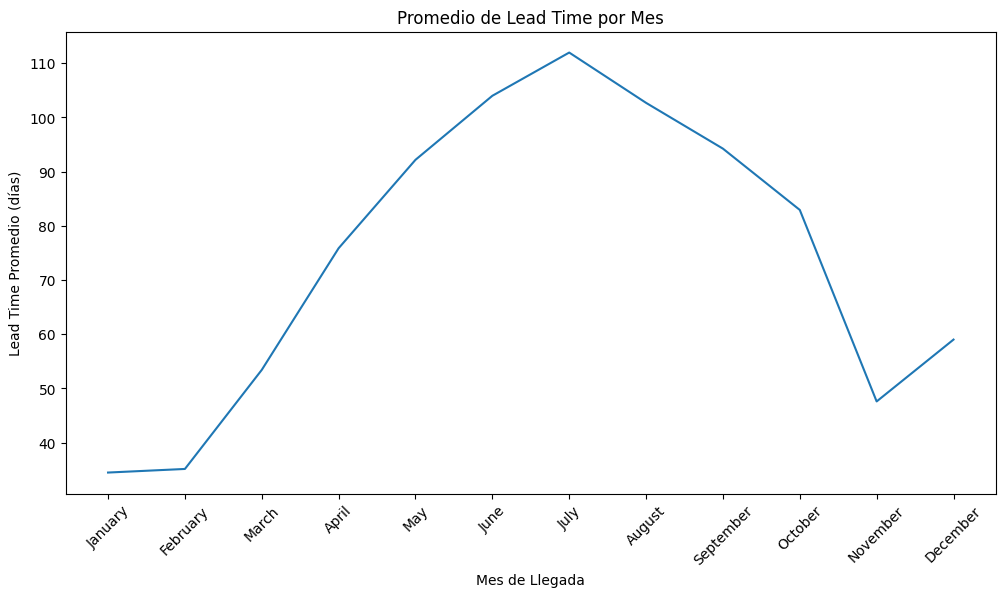

In [27]:
# Asegurarnos de que los datos estén ordenados por mes para el gráfico
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=[
    "January", "February", "March", "April", "May", "June", "July", "August",
    "September", "October", "November", "December"], ordered=True)

lead_time_month = df.groupby('arrival_date_month')['lead_time'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=lead_time_month.index, y=lead_time_month.values)
plt.title("Promedio de Lead Time por Mes")
plt.xlabel("Mes de Llegada")
plt.ylabel("Lead Time Promedio (días)")
plt.xticks(rotation=45)
plt.show()



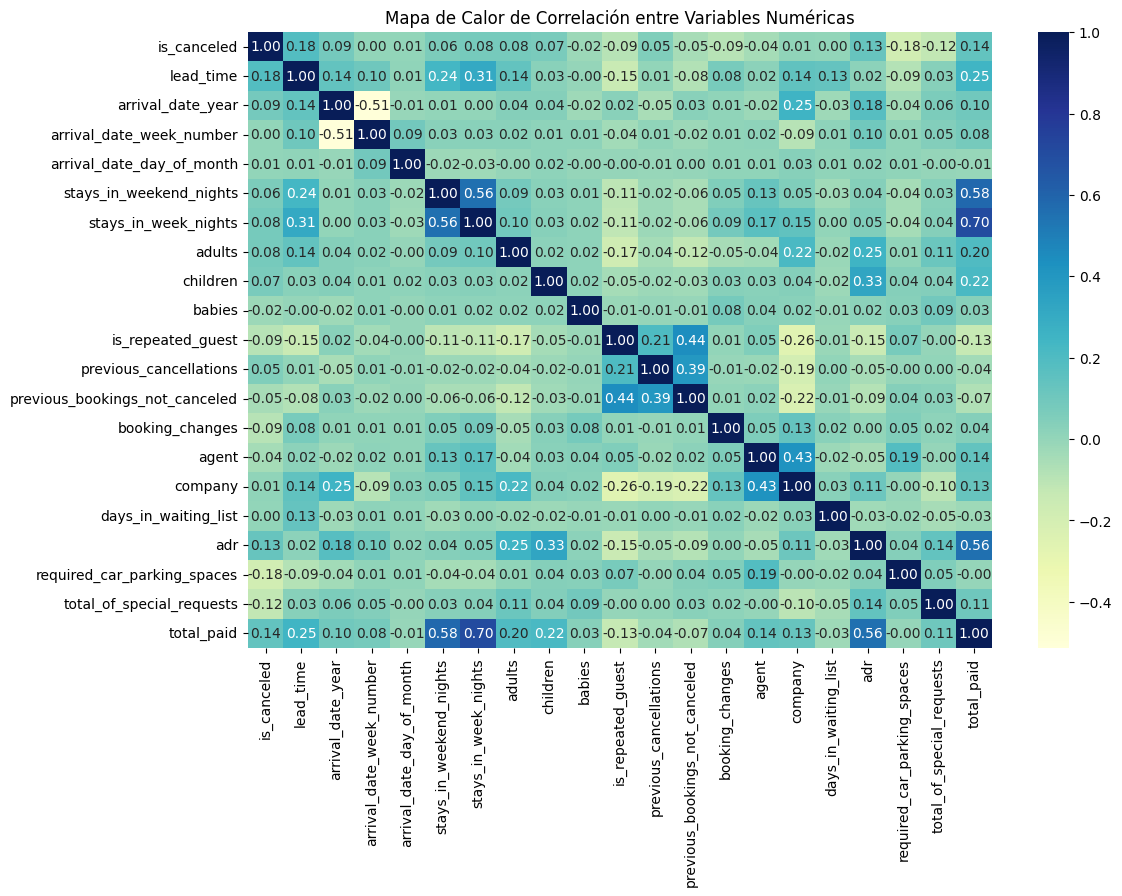

In [29]:
# Se importa de nuevo las bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos las columnas que queremos ver
numerical_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(12, 8))
correlation_matrix = numerical_df.corr()  # Calcular solo el valor numerico
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Mapa de Calor de Correlación entre Variables Numéricas")
plt.show()

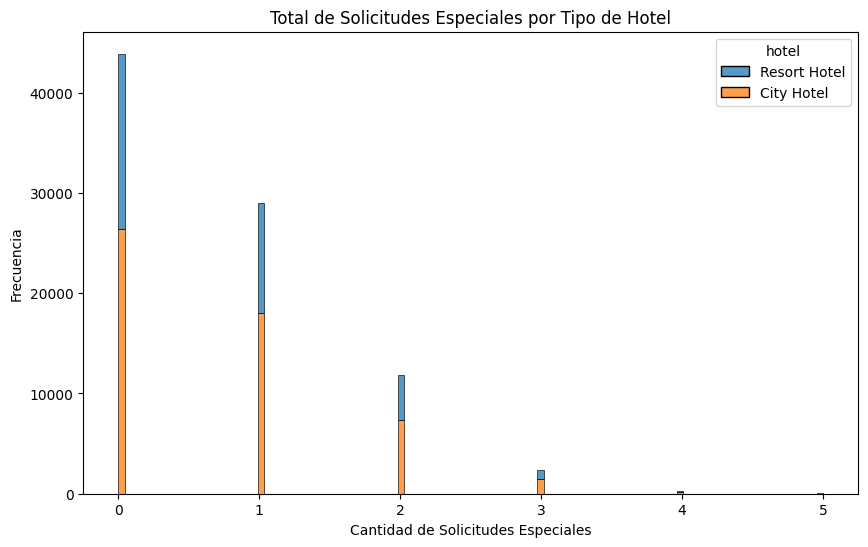

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="total_of_special_requests", hue="hotel", multiple="stack")
plt.title("Total de Solicitudes Especiales por Tipo de Hotel")
plt.xlabel("Cantidad de Solicitudes Especiales")
plt.ylabel("Frecuencia")
plt.show()


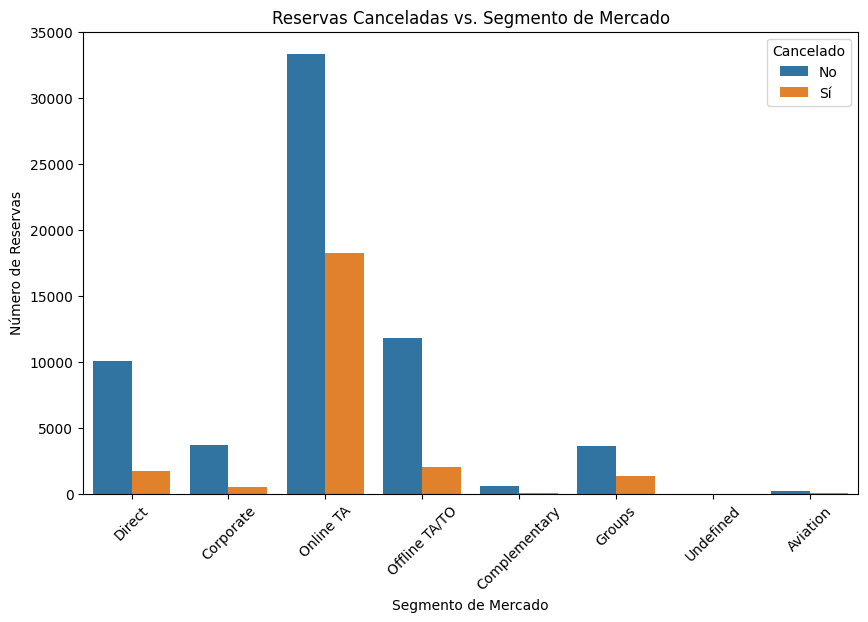

In [33]:
# Gráfico de barras para mostrar la cancelación según el segmento de mercado
plt.figure(figsize=(10, 6))
sns.countplot(x='market_segment', hue='is_canceled', data=df)
plt.title("Reservas Canceladas vs. Segmento de Mercado")
plt.xlabel("Segmento de Mercado")
plt.ylabel("Número de Reservas")
plt.legend(title="Cancelado", labels=["No", "Sí"])
plt.xticks(rotation=45)
plt.show()